In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('titanic.csv')
    print("Successfully loaded titanic.csv")
except FileNotFoundError:
    print(" Error: 'titanic.csv' not found. Make sure the file is in the same folder.")

print("\n--- General info about the dataset: ---")
df.info()
print("\n--- First 5 rows of the dataset: ---")
print(df.head())

Successfully loaded titanic.csv

--- General info about the dataset: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- First 5 rows of the dataset: ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1 

In [10]:
df_clean = df.copy()

median_age = df_clean['Age'].median()
df_clean['Age'] = df_clean['Age'].fillna(median_age) # Changed from inplace=True
print("Missing 'Age' values filled with median.")

df_clean.dropna(subset=['Embarked'], inplace=True)
print("Rows with missing 'Embarked' dropped.")

df_clean['Cabin'] = df_clean['Cabin'].notna().astype(int)
print("Transformed 'Cabin' column into 'HasCabin' feature (1 or 0).")

df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})
print("Converted 'Sex' column to numeric.")

df_clean['Embarked'] = df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print("Converted 'Embarked' column to numeric.")

df_clean.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
print("Dropped unnecessary columns: PassengerId, Name, Ticket.")

print("\n--- Data Info After Cleaning ---")
df_clean.info()

print("\n--- First 5 rows of the cleaned data ---")
print(df_clean.head())

Missing 'Age' values filled with median.
Rows with missing 'Embarked' dropped.
Transformed 'Cabin' column into 'HasCabin' feature (1 or 0).
Converted 'Sex' column to numeric.
Converted 'Embarked' column to numeric.
Dropped unnecessary columns: PassengerId, Name, Ticket.

--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     889 non-null    int64  
 8   Embarked  889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB

--- First 5 rows of the cleaned data ---
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0  

--- Correlation Matrix ---
          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.335549  0.541585 -0.069822 -0.034040  0.083151   
Pclass   -0.335549  1.000000 -0.127741 -0.336512  0.081656  0.016824   
Sex       0.541585 -0.127741  1.000000 -0.086506  0.116348  0.247508   
Age      -0.069822 -0.336512 -0.086506  1.000000 -0.232543 -0.171485   
SibSp    -0.034040  0.081656  0.116348 -0.232543  1.000000  0.414542   
Parch     0.083151  0.016824  0.247508 -0.171485  0.414542  1.000000   
Fare      0.255290 -0.548193  0.179958  0.093707  0.160887  0.217532   
Cabin     0.313435 -0.723815  0.135589  0.235550 -0.038657  0.039101   
Embarked  0.108669  0.043835  0.118593 -0.007165 -0.060606 -0.079320   

              Fare     Cabin  Embarked  
Survived  0.255290  0.313435  0.108669  
Pclass   -0.548193 -0.723815  0.043835  
Sex       0.179958  0.135589  0.118593  
Age       0.093707  0.235550 -0.007165  
SibSp     0.160887 -0.038657 -0.060606  
Parch 

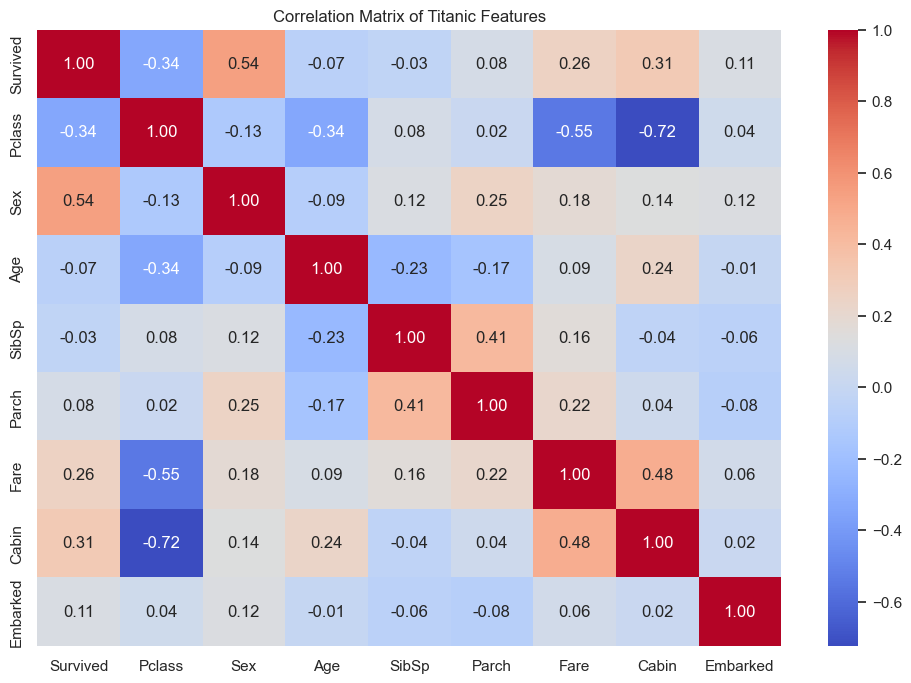

In [11]:
corr_matrix = df_clean.corr(method='pearson')

print("--- Correlation Matrix ---")
print(corr_matrix)

print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Titanic Features')
plt.show()


--- Visualizing Key Relationships ---


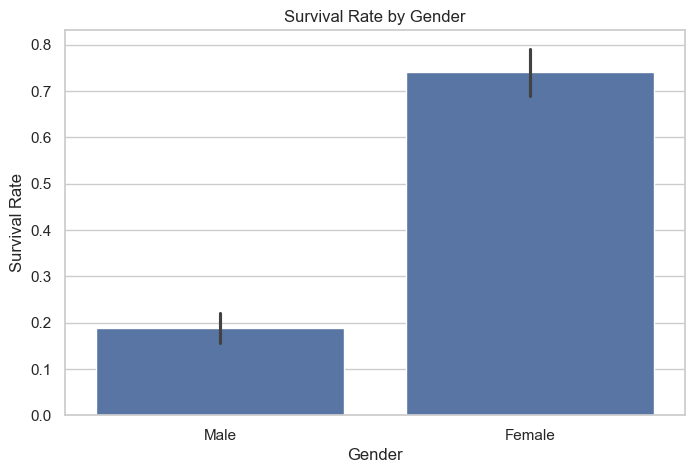

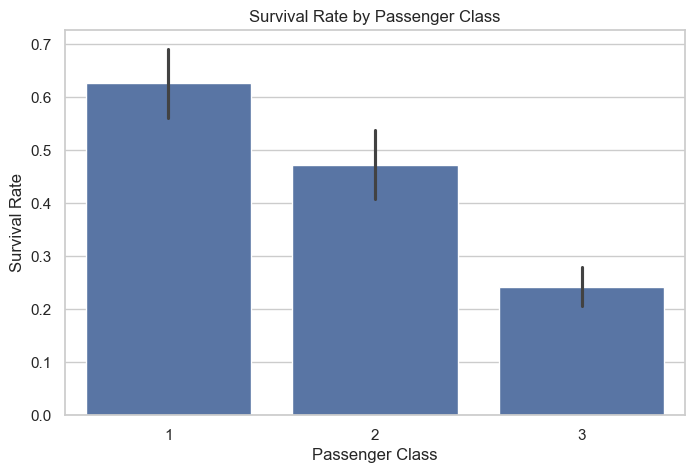

In [12]:
print("\n--- Visualizing Key Relationships ---")

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x=df_clean['Sex'].map({0: 'Male', 1: 'Female'}), y='Survived', data=df_clean)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df_clean)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

In [13]:
print("--- Statistical Summary (describe) ---")

print(df_clean.describe().T)

--- Statistical Summary (describe) ---
          count       mean        std   min      25%      50%   75%       max
Survived  889.0   0.382452   0.486260  0.00   0.0000   0.0000   1.0    1.0000
Pclass    889.0   2.311586   0.834700  1.00   2.0000   3.0000   3.0    3.0000
Sex       889.0   0.350956   0.477538  0.00   0.0000   0.0000   1.0    1.0000
Age       889.0  29.315152  12.984932  0.42  22.0000  28.0000  35.0   80.0000
SibSp     889.0   0.524184   1.103705  0.00   0.0000   0.0000   1.0    8.0000
Parch     889.0   0.382452   0.806761  0.00   0.0000   0.0000   0.0    6.0000
Fare      889.0  32.096681  49.697504  0.00   7.8958  14.4542  31.0  512.3292
Cabin     889.0   0.227222   0.419273  0.00   0.0000   0.0000   0.0    1.0000
Embarked  889.0   0.362205   0.636157  0.00   0.0000   0.0000   1.0    2.0000


In [14]:
print("\n--- Survival Rate by Sex ---")

sex_survival = df_clean.groupby(df_clean['Sex'].map({0: 'Male', 1: 'Female'}))['Survived'].mean()
print(sex_survival)

print("\n--- Survival Rate by Pclass ---")
pclass_survival = df_clean.groupby('Pclass')['Survived'].mean()
print(pclass_survival)


--- Survival Rate by Sex ---
Sex
Female    0.740385
Male      0.188908
Name: Survived, dtype: float64

--- Survival Rate by Pclass ---
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [15]:
print("\n--- Crosstab: Count of Passengers by Pclass vs. Sex ---")
print(pd.crosstab(df_clean['Pclass'], df_clean['Sex'].map({0: 'Male', 1: 'Female'})))


--- Crosstab: Count of Passengers by Pclass vs. Sex ---
Sex     Female  Male
Pclass              
1           92   122
2           76   108
3          144   347


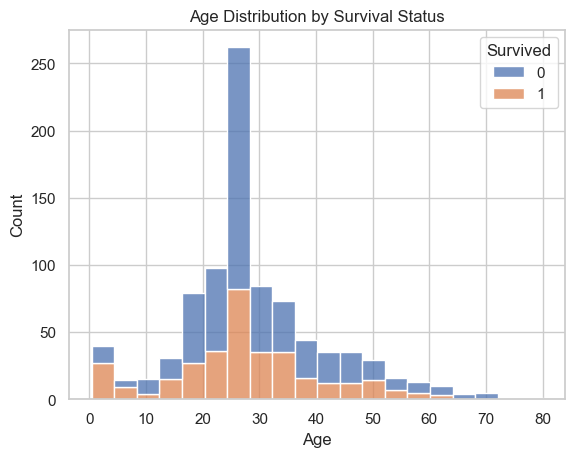

In [20]:
sns.histplot(data=df_clean, x="Age", hue="Survived", bins=20, kde=False, multiple="stack")
plt.title('Age Distribution by Survival Status')
plt.show()

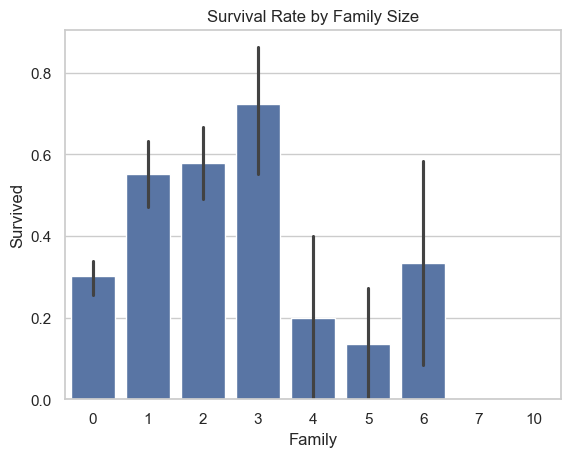

In [21]:
df_clean["Family"] = df_clean["SibSp"] + df_clean["Parch"]

sns.barplot(x="Family", y="Survived", data=df_clean)
plt.title('Survival Rate by Family Size')
plt.show()

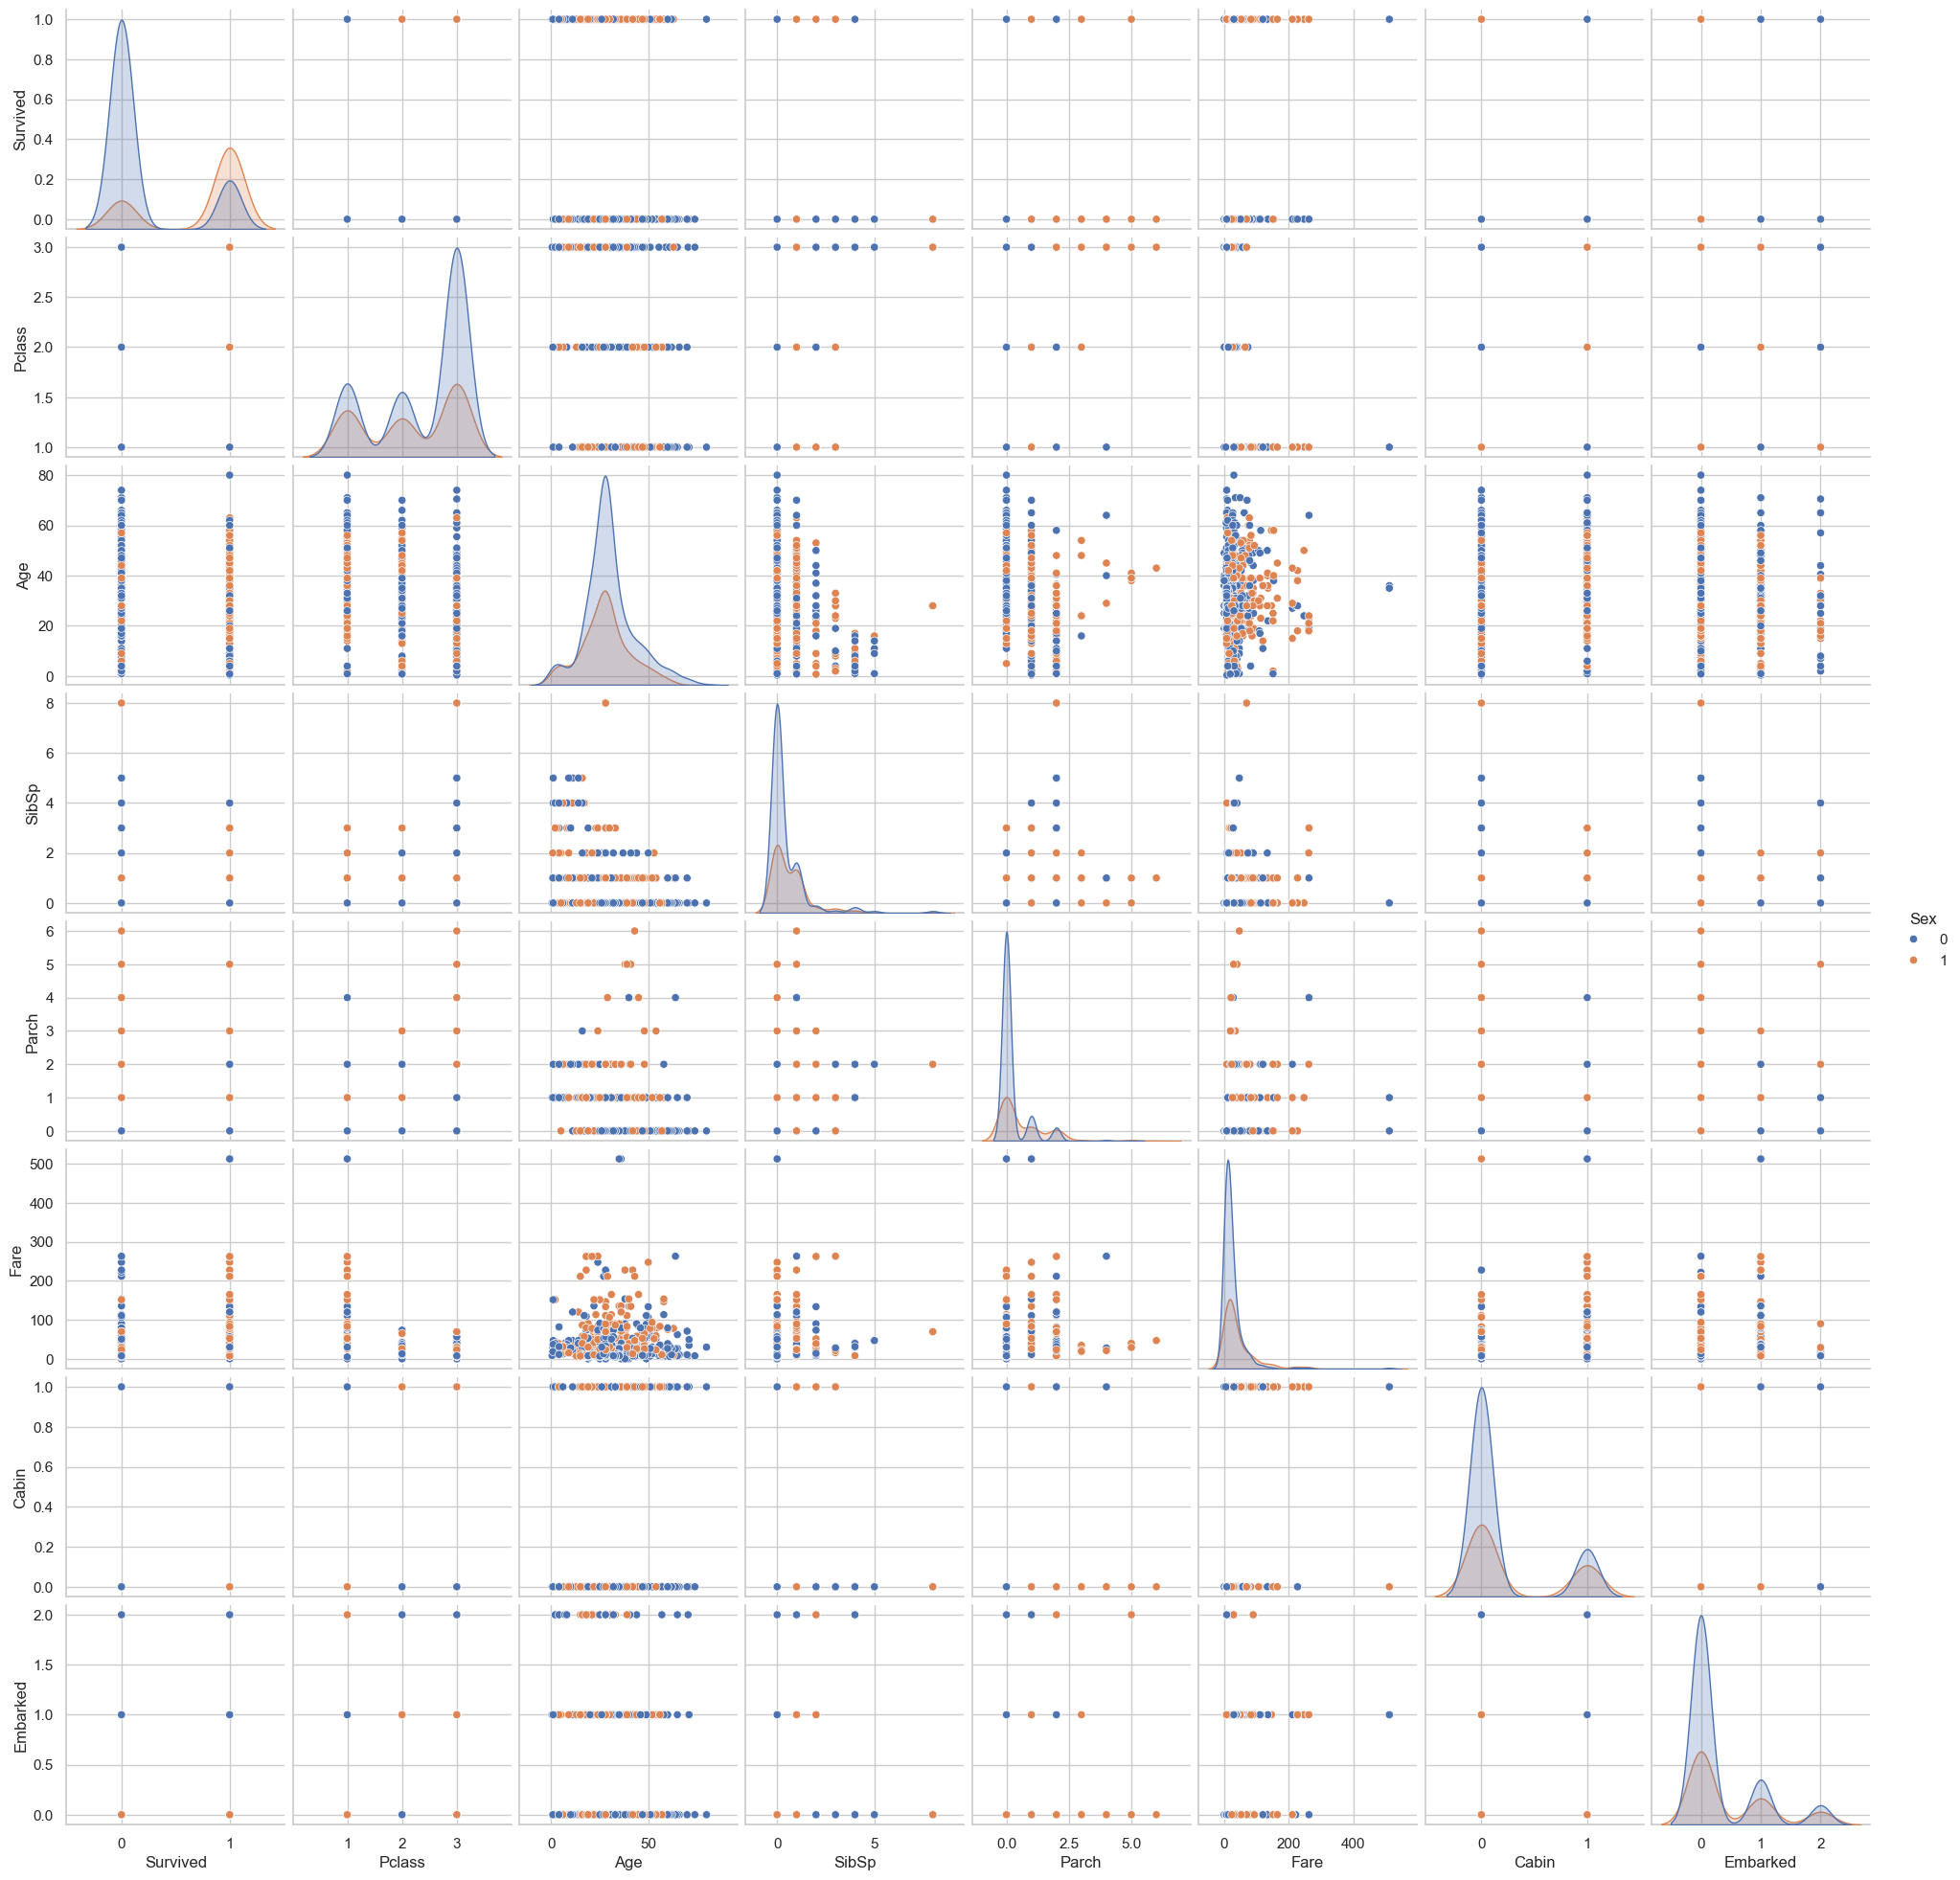

In [19]:
sns.pairplot(df_clean, hue = "Sex")
plt.show()